In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#import csv files
observations_df = pd.read_csv(r"C:\unzipped\biodiversity-starter\biodiversity_starter\observations.csv")
species_df = pd.read_csv(r"C:\unzipped\biodiversity-starter\biodiversity_starter\species_info.csv")



In [21]:
#first 5 rows of each df
print(observations_df.head())
print(species_df.head())



            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic 

In [39]:
#print column headings
print(observations_df.columns)
print(species_df.columns)



Index(['scientific_name', 'park_name', 'observations'], dtype='object')
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


In [24]:
#print df datatypes
print(observations_df.dtypes)
print(species_df.dtypes)


scientific_name    object
park_name          object
observations        int64
dtype: object
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


In [25]:
#row counts for df
observations_df.count()
species_df.count()

#conservation status might have less values because the majority of the animals arent endangered and in need of conservation

category               5824
scientific_name        5824
common_names           5824
conservation_status     191
dtype: int64

In [35]:
#check for duplicates
duplicates = observations_df.duplicated()
print(duplicates.value_counts())

duplicates_species = species_df.duplicated()
print(duplicates_species.value_counts())

#drop duplicates
observations_df = observations_df.drop_duplicates()


False    23281
Name: count, dtype: int64
False    5824
Name: count, dtype: int64


In [41]:
#view the unique values in conservation_status
print(species_df.conservation_status.unique())


[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64


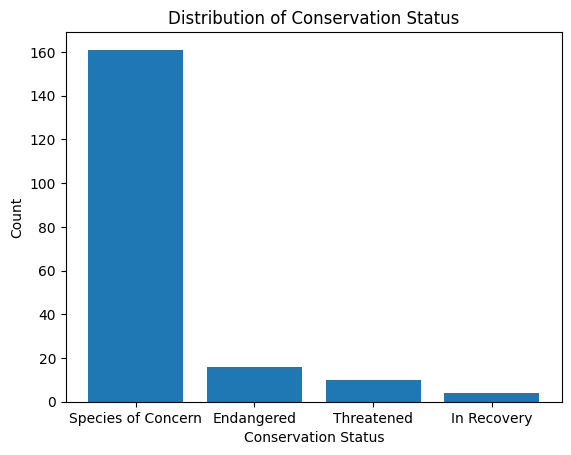

<Figure size 640x480 with 0 Axes>

In [246]:
#What is the distribution of conservation_status for animals?

#x axis values
con_status = ["Species of Concern", "Endangered", "Threatened", "In Recovery"]
#y axis values
con_status_count = [(species_df.conservation_status.value_counts()["Species of Concern"]), (species_df.conservation_status.value_counts()["Endangered"]), (species_df.conservation_status.value_counts()["Threatened"]), (species_df.conservation_status.value_counts()["In Recovery"])]
#plot bar graph
plt.bar(con_status, con_status_count)
plt.title("Distribution of Conservation Status")
plt.xlabel("Conservation Status")
plt.ylabel("Count")
plt.savefig(r"C:\Users\bhyder\OneDrive - Relyant Global, LLC\Pictures\dist_of_cons_status.png")
plt.show()
plt.clf()

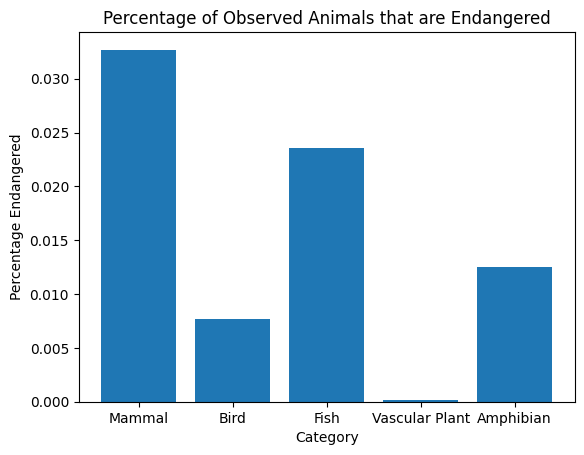

<Figure size 640x480 with 0 Axes>

In [247]:
#Are certain types of species more likely to be endangered?

#filter by endangered species
end_cat = species_df[species_df["conservation_status"] == "Endangered"]
#categories of endangered animals
categories = end_cat.category.unique()
#total counts of animals in each category
category_counts = species_df.category.value_counts()[categories].tolist()
#counts of endangered animals in each category
end_cat_counts = end_cat.category.value_counts()[categories].tolist()
#calculating percentage of category that is endangered
end_perc = [round(end_cat_counts[0] / category_counts[0], 4), round(end_cat_counts[1] / category_counts[1], 4), round(end_cat_counts[2] / category_counts[2], 4), round(end_cat_counts[3] / category_counts[3], 4), round(end_cat_counts[4] / category_counts[4], 4)]

#plotting bar graph
plt.bar(categories, end_perc)
plt.title("Percentage of Observed Animals that are Endangered")
plt.xlabel("Category")
plt.ylabel("Percentage Endangered")
plt.savefig(r"C:\Users\bhyder\OneDrive - Relyant Global, LLC\Pictures\perc_obs_end.png")
plt.show()
plt.clf()

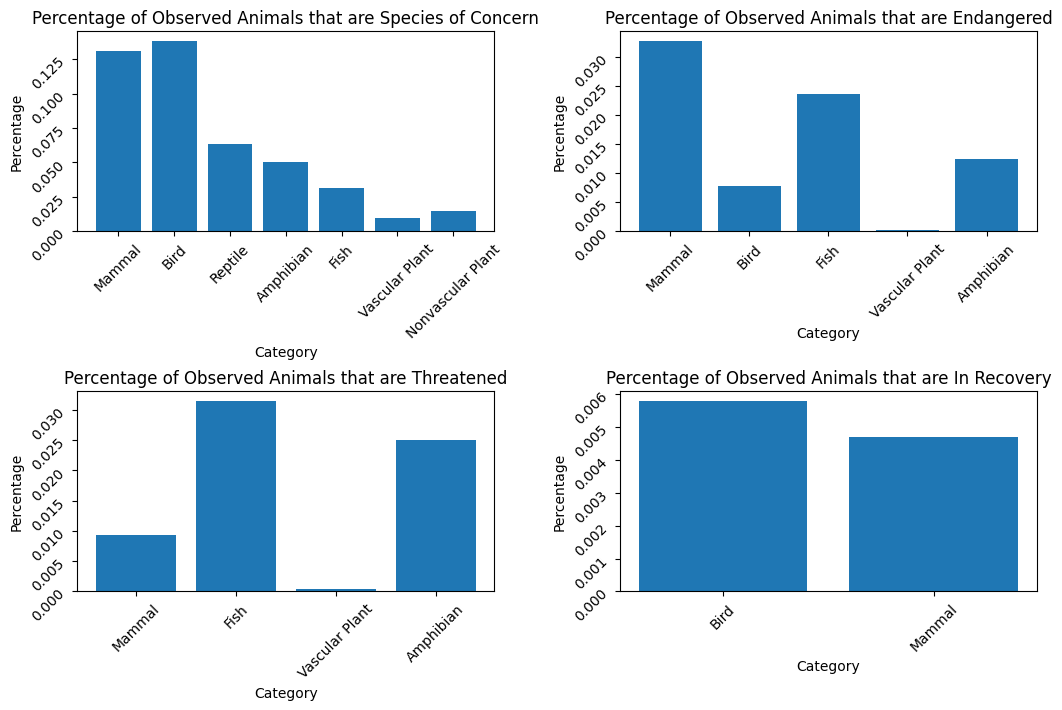

<Figure size 640x480 with 0 Axes>

In [298]:
#Are the differences between species and their conservation status significant?

#filter by species of concern
soc_cat = species_df[species_df["conservation_status"] == "Species of Concern"]
#categories of "species of concern" animals
soc_categories = soc_cat.category.unique()
#total counts of animals in each category
soc_category_counts = species_df.category.value_counts()[soc_categories].tolist()
#counts of "species of concern" animals in each category
soc_cat_counts = soc_cat.category.value_counts()[soc_categories].tolist()
#calculating percentage of category that is "species of concern"
soc_perc = [round(soc_cat_counts[0] / soc_category_counts[0], 4), round(soc_cat_counts[1] / soc_category_counts[1], 4), round(soc_cat_counts[2] / soc_category_counts[2], 4), round(soc_cat_counts[3] / soc_category_counts[3], 4), round(soc_cat_counts[4] / soc_category_counts[4], 4), round(soc_cat_counts[5] / soc_category_counts[5], 4), round(soc_cat_counts[6] / soc_category_counts[6], 4)]

#filter by endangered species
end_cat = species_df[species_df["conservation_status"] == "Endangered"]
#categories of endangered animals
end_categories = end_cat.category.unique()
#total counts of animals in each category
end_category_counts = species_df.category.value_counts()[end_categories].tolist()
#counts of endangered animals in each category
end_cat_counts = end_cat.category.value_counts()[end_categories].tolist()
#calculating percentage of category that is endangered
end_perc = [round(end_cat_counts[0] / end_category_counts[0], 4), round(end_cat_counts[1] / end_category_counts[1], 4), round(end_cat_counts[2] / end_category_counts[2], 4), round(end_cat_counts[3] / end_category_counts[3], 4), round(end_cat_counts[4] / end_category_counts[4], 4)]

#filter by threatened species
thr_cat = species_df[species_df["conservation_status"] == "Threatened"]
#categories of threatened animals
thr_categories = thr_cat.category.unique()
#total counts of animals in each category
thr_category_counts = species_df.category.value_counts()[thr_categories].tolist()
#counts of threatened animals in each category
thr_cat_counts = thr_cat.category.value_counts()[thr_categories].tolist()
#calculating percentage of category that is threatened
thr_perc = [round(thr_cat_counts[0] / thr_category_counts[0], 4), round(thr_cat_counts[1] / thr_category_counts[1], 4), round(thr_cat_counts[2] / thr_category_counts[2], 4), round(thr_cat_counts[3] / thr_category_counts[3], 4)]

#filter by in recovery species
ir_cat = species_df[species_df["conservation_status"] == "In Recovery"]
#categories of "in recovery" animals
ir_categories = ir_cat.category.unique()
#total counts of animals in each category
ir_category_counts = species_df.category.value_counts()[ir_categories].tolist()
#counts of "in recovery" animals in each category
ir_cat_counts = ir_cat.category.value_counts()[ir_categories].tolist()
#calculating percentage of category that is "in recovery"
ir_perc = [round(ir_cat_counts[0] / ir_category_counts[0], 4), round(ir_cat_counts[1] / ir_category_counts[1], 4)]

#create subplots
figure, axe = plt.subplots(2, 2, figsize=(24,8))
#adjust margins
plt.subplots_adjust(left=0.3, right=0.7, bottom=0.2, top=0.9, wspace=0.3, hspace=0.8)

#plot subplots
axe[0, 0].bar(soc_categories, soc_perc)
axe[0, 0].tick_params(labelrotation=45)
axe[0, 0].set_title("Percentage of Observed Animals that are Species of Concern")
axe[0, 0].set_xlabel("Category")
axe[0, 0].set_ylabel("Percentage")

axe[0, 1].bar(end_categories, end_perc)
axe[0, 1].tick_params(labelrotation=45)
axe[0, 1].set_title("Percentage of Observed Animals that are Endangered")
axe[0, 1].set_xlabel("Category")
axe[0, 1].set_ylabel("Percentage")

axe[1, 0].bar(thr_categories, thr_perc)
axe[1, 0].tick_params(labelrotation=45)
axe[1, 0].set_title("Percentage of Observed Animals that are Threatened")
axe[1, 0].set_xlabel("Category")
axe[1, 0].set_ylabel("Percentage")

axe[1, 1].bar(ir_categories, ir_perc)
axe[1, 1].tick_params(labelrotation=45)
axe[1, 1].set_title("Percentage of Observed Animals that are In Recovery")
axe[1, 1].set_xlabel("Category")
axe[1, 1].set_ylabel("Percentage")
plt.savefig(r"C:\Users\bhyder\OneDrive - Relyant Global, LLC\Pictures\perc_of_con_status_cat.png")
plt.show()
plt.clf()

In [245]:
#Which species were spotted the most at each park?

#merge dataframes
biodiversity = pd.merge(species_df, observations_df)

#find unique park names
parks = biodiversity.park_name.unique()

#organize by park name
park0_obs = biodiversity[biodiversity["park_name"] == parks[0]]
park1_obs = biodiversity[biodiversity["park_name"] == parks[1]]
park2_obs = biodiversity[biodiversity["park_name"] == parks[2]]
park3_obs = biodiversity[biodiversity["park_name"] == parks[3]]

#filter by max observations
parks_max_obs = [park0_obs.observations.max(), park1_obs.observations.max(), park2_obs.observations.max(), park3_obs.observations.max()]


#find species name that matches max observations
park0_name = biodiversity[biodiversity["observations"] == parks_max_obs[0]]
park1_name = biodiversity[biodiversity["observations"] == parks_max_obs[1]]
park2_name = biodiversity[biodiversity["observations"] == parks_max_obs[2]]
park3_name = biodiversity[biodiversity["observations"] == parks_max_obs[3]]

#list of species with max observations for each park
parks_max_name = [park0_name.common_names, park1_name.common_names, park2_name.common_names, park3_name.common_names]

#dictionary of max observations in each park
max_obs_park = {parks[0]: parks_max_name[0], parks[1]: parks_max_name[1], parks[2]: parks_max_name[2], parks[3]: parks_max_name[3]}

#each park had multiple max observations so making a figure to visualize this was virtually impossible. This is why the results are simply listed in a dictionary